# Машинное обучение, DS-поток, осень 2022
## Задание 3.4


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 10 баллов;
* Задача 2 &mdash; 20 баллов;
* Задача 3 &mdash; 150 баллов;
* Задача 4 &mdash; 10 баллов;
* Задача 5 &mdash; 80 баллов.

----

$\huge Исправления$ 

В номере 1 )Переделал первый номер


В номере 3) В методе predict-proba  поменял местами предсказания.Засунул все метрики в таблички

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from time import time
from scipy import special

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style("dark")
sns.set(font_scale=1.6)

## Задача 1

Во взвешенном методе наименьших квадратов каждому наблюдению задается неко-
торый известный вес $w_i$. Задача имеет вид $\sum\limits_{i=1}^n w_i(Y_i - x_i^T\theta)^2 \rightarrow \min\limits_\theta$. Найдите решение
задачи в матричном виде.

![](1.jpg)

## Задача 2

Рассмотрим логистическую регрессию. Пусть $\large{x_i \in \mathbb{R}^d, Y_i \sim Bern(\mu_\theta(x_i))}$. 

Мы предполагаем, что $\large{\mu_\theta(x_i) = P_\theta(Y_i = 1)  = \sigma(x_i^T\theta)= \cfrac{e^{x_i^T\theta}}{1 + e^{x_i^T\theta}}}$.

Зададим регуляризацию через минимизацию следующего функционала:
$$\large{F(\theta) = -\ell_{X, Y}(\theta) + \lambda ||\theta||_2^2},$$

где $\large{\ell_{X, Y}(\theta)}$ &mdash; логарифмическая функция правдоподобия

1. Опишите процесс оптимизации методами GD и SGD.
2. Опишите процесс оптимизации методом IRLS

![](5.jpg)

![](2.jpg)

![](3.jpg)

![](4.jpg)

## Задача 3

**1.** Реализуйте логистическую регрессию с регуляризацией для трех вариантов поиска оценки параметров:
* обычный градиентный спуск;
* стохастический mini-batch градиентный спуск с размером батча 5-10;
* IRLS.

Для измерения времени работы **каждого** шага используйте 

`from time import time`

*Замечания.* 

1. Для чистоты эксперимента время шага внутри цикла нужно замерять от конца предыдущего шага до конца текущего, а не от начала текущего шага.
2. Иногда при подсчете сигмоиды и оптимизируемого функционала могут возникать вычислительные ошибки. Для их избежания существуют специальные трюки.
    * [How to Evaluate the Logistic Loss and not NaN trying](http://fa.bianp.net/blog/2019/evaluate_logistic/)
    * [The log-sum-exp trick in Machine Learning](https://www.xarg.org/2016/06/the-log-sum-exp-trick-in-machine-learning/)
    * [Exp-normalize trick](https://timvieira.github.io/blog/post/2014/02/11/exp-normalize-trick/)<br>
3. Трюки не обязательно реализовывать самостоятельно, можете воспользоваться функциями для них из `scipy`, `numpy`: 
    * [`scipy.special.logsumexp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.logsumexp.html);
    * [`numpy.logaddexp`](https://numpy.org/doc/stable/reference/generated/numpy.logaddexp.html).
4. В методе IRLS можно добавить малый регуляризатор даже если регуляризации нет для исключения вычислительных проблем.

In [2]:
class LogisticRegression():
    '''
    Модель логистической регрессии. Имеет следующие гиперпараметры:
    
    :param alpha: параметр регуляризации. 
                     Если равно 0, то регуляризация не происходит.
    :param lr: константа, на которую домножаем градиент при обучении
    :param eps: ограничение на норму невязки в случае
                   если используется критерий criterion='eps'
    :param max_iter: ограничение на кол-во итераций в случае 
                        если используется критерий criterion='max_iter'
    :param method: если равно 'gd', то используется обычный градиентный спуск,
                   если равно 'sgd', то используется стохастический 
                        градиентный спуск,
                   если равно 'irls', то используется метод IRLS.
    :param criterion: если равно 'eps', то используем ограничение 
                        на норму невязки,
                      если равно 'max_iter', то используем ограничение 
                        на количество итераций
    :param fit_intercept: указывает, следует ли добавить константу в признаки
    :param save_history: указывает, следует ли сохранять историю обучения
    '''
    
    def __init__(self, alpha=0, lr=0.5, eps=1e-3, max_iter=1e5, 
                 method='gd', criterion='max_iter', 
                 fit_intercept=True, save_history=True):
        '''Создает модель и инициализирует параметры.'''
        
        criterion_error_msg = 'выбран неправильный критерий остановки'
        assert criterion in ['max_iter', 'eps'], criterion_error_msg
        
        method_error_msg = 'выбран неправильный метод'
        assert method in ['gd', 'sgd', 'irls'], method_error_msg

        self.alpha = alpha
        self.lr = lr
        self.eps = eps
        self.max_iter = max_iter
        self.criterion = criterion
        self.method = method
        self.fit_intercept = fit_intercept
        self.save_history = save_history
        self.history = list()  # для хранения истории обучения и времени на один шаг
        self.size_of_bathch = 10
        self.delta_time = []

        
    @staticmethod
    def _sigmoid(x):
        return 1 / (1 + np.exp(-x))
        
    def _grad(self, thetta, X, Y):
        """
        Функция вычисляет градиент от оптимизируемой функции
        :param thetta: - параметр модели
        :param X: - фичи
        :param Y: - таргеты
        """
        d = len(thetta)
        n = len(Y)
        assert X.shape[1] == d, "Dim problem"
        assert X.shape[0] == n, "Dim problem"
        thetta = thetta.reshape((d, 1))
        Y = Y.reshape(n, 1)
        return X.T @ (self._sigmoid(X@thetta) + Y - 1) + 2 * self.alpha

    def _gissian(self, thetta, X, Y):
        """
        Функция вычисляет гиссиан от оптимизируемой функции
        :param thetta: - параметр модели
        :param X: - фичи
        :param Y: - таргеты
        """
        d = len(thetta)
        n = len(Y)
        assert X.shape[1] == d, "Dim problem"
        assert X.shape[0] == n, "Dim problem"
        thetta = thetta.reshape((d, 1))
        Y = Y.reshape(n, 1)
        X = X.reshape((n, d, 1))
        helper = self._sigmoid(X.reshape((n, 1, d))@thetta) * (1 - self._sigmoid(X.reshape((n, 1, d))@thetta))
        helper = (helper * X @ X.reshape((n, 1, d)))
        return helper.sum(axis=0) - (2 * n * self.alpha) * np.eye(d)
    
    def _make_grad_step(self, thetta, X, Y):
        """
        Функция делает шаг градиентного спуска
        :param thetta: - параметр модели
        :param X: - фичи
        :param Y: - таргеты
        :return: - новое значение параметра
        """
        return thetta - self.lr * self._grad(thetta, X, Y)
    def _gd_method(self, thetta, X, Y):
        return self._make_grad_step(thetta, X, Y)

    def _sgd_method(self, thetta, X, Y):
        random_index = np.random.randint(X.shape[0] - 1, size=self.size_of_bathch)
        X = X[random_index]
        Y = Y[random_index]
        return self._make_grad_step(thetta, X, Y)
    
    def irls_method(self, thetta, X, Y):
        gissian = self._gissian(thetta, X,  Y)
        gissian += np.eye(gissian.shape[0]) * 0.0001
        return thetta - np.linalg.inv(gissian) @ self._grad(thetta, X, Y)       
    
    def _add_intercept(self, X):
        '''
        Добавляем свободный коэффициент к нашей модели. 
        Это происходит путем добавления вектора из 1 к исходной матрице.
        
        :param X: исходная матрица признаков
        :return: матрица X с добавленным свободным коэффициентов
        '''
        
        X_copy = np.full((X.shape[0], X.shape[1] + 1), fill_value=1)
        X_copy[:, :-1] = X

        return X_copy

    
    def _max_iter_fit(self, X, Y):
        '''
        Обучает модель логистической регресии с помощью выбранного метода,
        пока не выполнит self.max_iter итераций
        Также, в случае self.save_history=True, добавляет в self.history 
        текущее значение оптимизируемого функционала 
        и время обновления коэффициентов. 
        :param X: матрица признаков
        :param Y: истинные метки
        :return: оптимальный параметр и количество итераций
        '''
        foo = self.function[self.method]
        count_of_iteration = 0
        thetta = np.random.rand(X.shape[1], 1)
        for i in range(self.max_iter):
            time_start = time()
            count_of_iteration += 1
            thetta = foo(thetta, X, Y)
            time_end = time()
            self.delta_time.append(time_end - time_start)
            if (self.save_history):
                self.history.append(thetta)
        return thetta, count_of_iteration
    
    def _eps_fit(self, X, Y):
        '''
        Обучает модель логистической регресии с помощью выбранного метода,
        пока точность не будет удовлетворять self.eps
        Также, в случае self.save_history=True, добавляет в self.history 
        текущее значение оптимизируемого функционала 
        и время обновления коэффициентов. 
        :param X: матрица признаков
        :param Y: истинные метки
        :return: оптимальный параметр и количество итераций
        '''
        foo = self.function[self.method]
        count_of_iteration = 0
        thetta = np.random.rand(X.shape[1], 1)
        old_thetta = thetta + 2 * self.eps
        while(((thetta - old_thetta).T @ (thetta - old_thetta)) > self.eps ** 2):
            time_start = time()
            count_of_iteration += 1
            old_thetta = thetta
            thetta = foo(thetta, X, Y)
            time_end = time()
            self.delta_time.append(time_end - time_start)
            if (self.save_history):
                self.history.append(thetta)
        return thetta, count_of_iteration
            
    def fit(self, X, Y):
        '''
        Обучает модель логистической регресии с помощью выбранного метода,
        пока не выполнится критерий остновки self.criterion.
        Также, в случае self.save_history=True, добавляет в self.history 
        текущее значение оптимизируемого функционала 
        и время обновления коэффициентов. 
        
        :param X: матрица признаков
        :param Y: истинные метки
        '''
        
        assert X.shape[0] == Y.shape[0]

        if self.fit_intercept:  # добавляем свободный коэфициент
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()
        self.function = {'gd' : self._gd_method, 'sgd' : self._sgd_method, 'irls' : self.irls_method}
        if (self.criterion == 'max_iter'):
            self.coef_, self.n_iter_ = self._max_iter_fit(X, Y)
        else:
            self.coef_, self.n_iter_ = self._eps_fit(X, Y)
        
        #self.intercept_ = <...>  # свободный коэффициент
        
        return self

        
    def predict(self, X):
        '''
        Применяет обученную модель к данным 
        и возвращает точечное предсказание (оценку класса).
        
        :param X: матрица признаков
        :return: предсказание с размерностью (n_test, )
        '''

        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()
            
        return np.round(self.predict_proba(X).T[1]).T

        
    def predict_proba(self, X):
        '''
        Применяет обученную модель к данным
        и возвращает предсказание вероятности классов 0 и 1.
        
        :param X: матрица признаков
        :return: вероятности предсказания с размерностью (n_test, 2)
        '''

        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()

        prob_predictions = self._sigmoid(X @ self.coef_)
        prob_predictions = (self._add_intercept(prob_predictions)).T
        prob_predictions[0] = prob_predictions[1] - prob_predictions[0]
        prob_predictions[1] -= prob_predictions[0]
        return prob_predictions.T

Рассмотрим игрушечный датасет на $30$ признаков `load_breast_cancer` из библиотеки `sklearn`. Это относительно простой для бинарной классификации датасет по диагностике рака молочной железы.

Ради интереса можно прочитать описание признаков.

In [13]:
dataset = load_breast_cancer()
dataset['DESCR'].split('\n')[11:31]

['    :Attribute Information:',
 '        - radius (mean of distances from center to points on the perimeter)',
 '        - texture (standard deviation of gray-scale values)',
 '        - perimeter',
 '        - area',
 '        - smoothness (local variation in radius lengths)',
 '        - compactness (perimeter^2 / area - 1.0)',
 '        - concavity (severity of concave portions of the contour)',
 '        - concave points (number of concave portions of the contour)',
 '        - symmetry',
 '        - fractal dimension ("coastline approximation" - 1)',
 '',
 '        The mean, standard error, and "worst" or largest (mean of the three',
 '        worst/largest values) of these features were computed for each image,',
 '        resulting in 30 features.  For instance, field 0 is Mean Radius, field',
 '        10 is Radius SE, field 20 is Worst Radius.',
 '',
 '        - class:',
 '                - WDBC-Malignant',
 '                - WDBC-Benign']

Разделим нашу выборку на обучающую и тестовую:

In [4]:
X, Y = dataset['data'], dataset['target']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((455, 30), (114, 30), (455,), (114,))

При использовании регуляризации данные необходимо нормализовать. Воспользуемся для этого классом `StandardScaler` из библиотеки `sklearn`. 

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**2.** Теперь обучите три модели логистической регрессии без регуляризации с помощью методов
* обычный градиентный спуск;
* стохастический mini-batch градиентный спуск;
* IRLS.

Постройте график, на котором нанесите три кривые обучения, каждая из которых отображает зависимость оптимизируемого функционала от номера итерации метода. **Функционал должен быть одинаковый для всех моделей: логарифм правдоподобия без минусов**. Нарисуйте также график зависимости этого функционала от времени работы метода. Сделайте выводы. Что будет при обучении на датасете, в котором больше строк, а число столбцов останется прежним?

*Замечания:* 
* Все графики должны быть информативны, с подписанными осями и т.д..
* Для чистоты эксперимента желательно не запускать в момент обучения другие задачи и провести обучение несколько раз, усреднив результаты.

In [6]:
gd = LogisticRegression(max_iter=10000, method='gd')
sgd = LogisticRegression(max_iter=10000, method='sgd')
irls = LogisticRegression(max_iter=10000, method='irls')

In [7]:
gd.fit(X_train, Y_train)

In [8]:
sgd.fit(X_train, Y_train)

In [9]:
irls.fit(X_train, Y_train)

In [10]:
gd_history = np.array(gd.history).reshape((10000, 30)).T
sgd_history = np.array(sgd.history).reshape((10000, 30)).T
irls_history = np.array(irls.history).reshape((10000, 30)).T

Теперь построим функцию которая по параметрам тетта возвращает функционал от этого параметра

In [14]:
def local_predict(thetta, X, Y):
    Y = Y.reshape((Y.shape[0], 1))
    rez = X@thetta
        
    helper1 = -(1 - Y) * np.logaddexp(0,  -rez)
    helper2 = - Y * np.logaddexp(0, rez)
    return (helper1 + helper2).sum(axis=0)

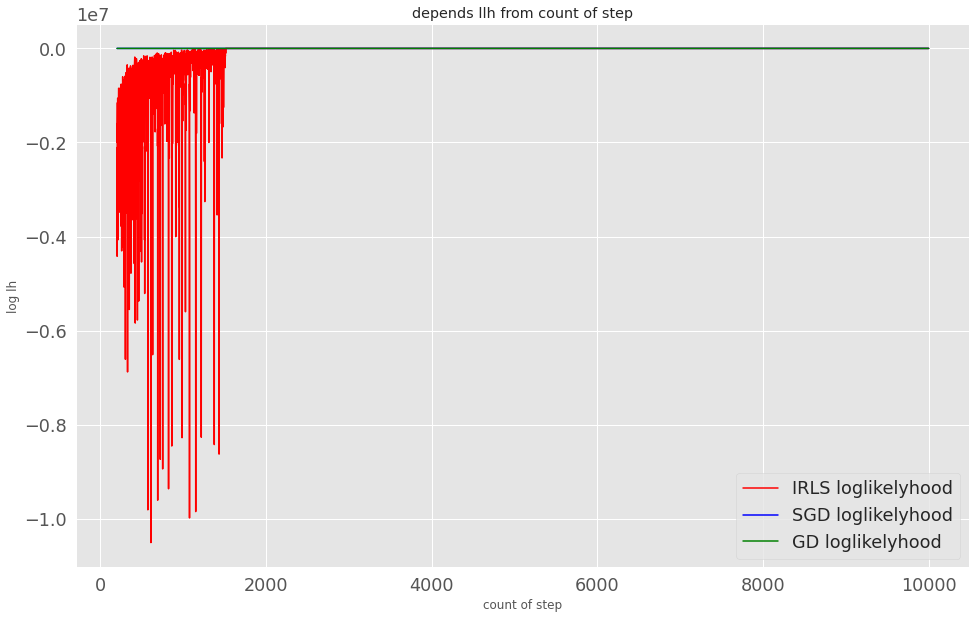

In [15]:
depend_log_LH_gd = local_predict(gd_history, X_train, Y_train)
depend_log_LH_sgd = local_predict(sgd_history, X_train, Y_train)
depend_log_LH_irls = local_predict(irls_history, X_train, Y_train)
x = np.arange(0, 10000)
plt.style.use('ggplot')
plt.figure(figsize=(16, 10))
plt.plot(x[200:], depend_log_LH_irls[200:], label='IRLS loglikelyhood', c='red')
plt.plot(x[200:], depend_log_LH_sgd[200:], label='SGD loglikelyhood', c='blue')
plt.plot(x[200:], depend_log_LH_gd[200:], label='GD loglikelyhood', c='green')
plt.xlabel('count of step')
plt.ylabel('log lh')
plt.title('depends llh from count of step')
plt.legend()
plt.show()

Приблизим место,где графики уже сошлись

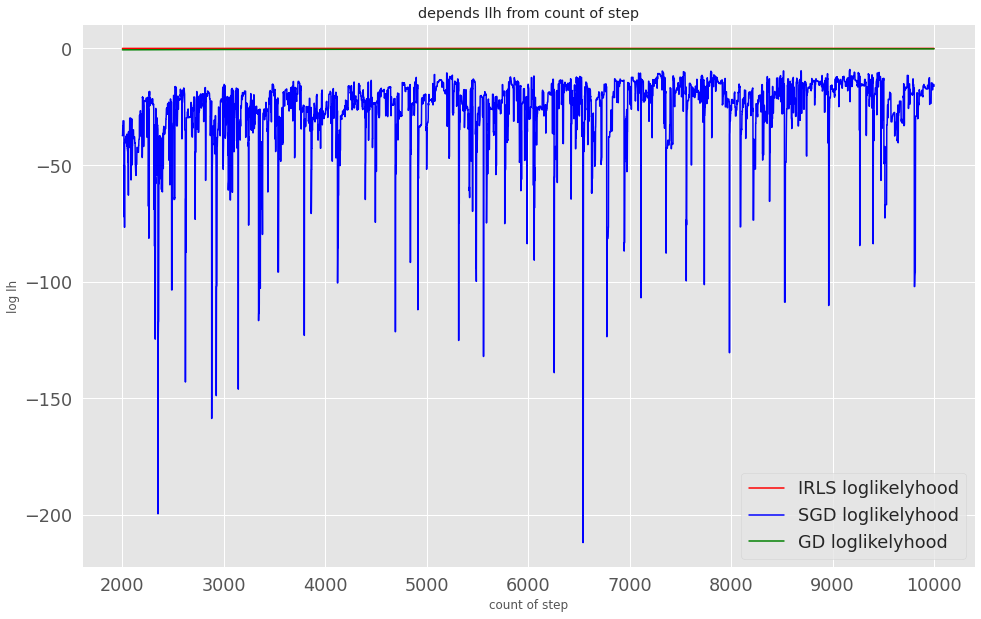

In [16]:
plt.style.use('ggplot')
plt.figure(figsize=(16, 10))
plt.plot(x[2000:], depend_log_LH_irls[2000:], label='IRLS loglikelyhood', c='red')
plt.plot(x[2000:], depend_log_LH_sgd[2000:], label='SGD loglikelyhood', c='blue')
plt.plot(x[2000:], depend_log_LH_gd[2000:], label='GD loglikelyhood', c='green')
plt.xlabel('count of step')
plt.ylabel('log lh')
plt.title('depends llh from count of step')
plt.legend()
plt.show()

Заметим. Что IRLS хуже сходиться в начале, а SGD в конце

Посмотрим на зависимость времени работы от шага.

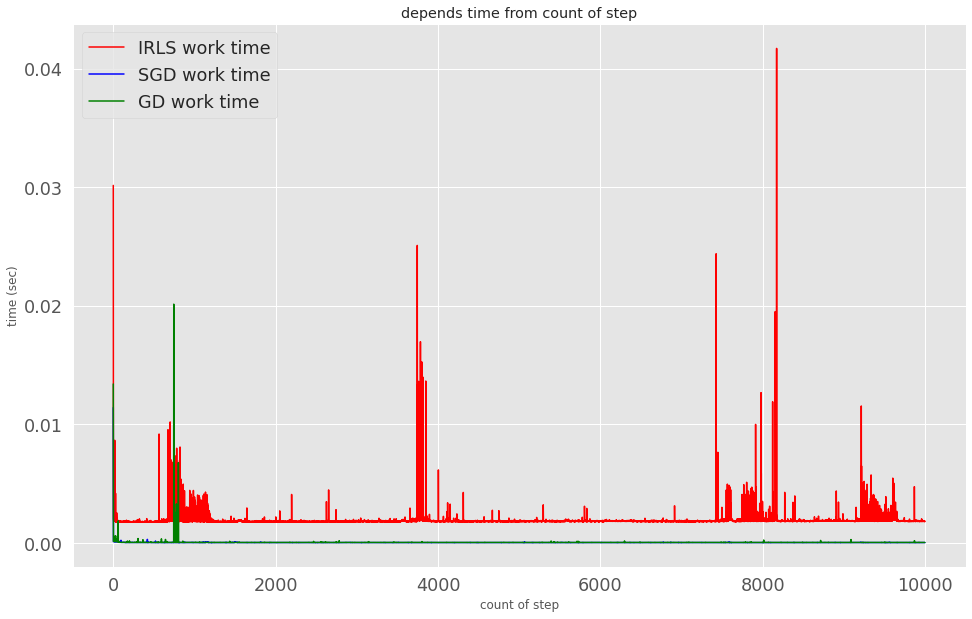

In [17]:
gd_time = np.array(gd.delta_time)
sgd_time = np.array(sgd.delta_time)
irls_time = np.array(irls.delta_time)
plt.style.use('ggplot')
plt.figure(figsize=(16, 10))
plt.plot(x, irls_time, label='IRLS work time', c='red')
plt.plot(x, sgd_time, label='SGD work time', c='blue')
plt.plot(x, gd_time, label='GD work time', c='green')
plt.xlabel('count of step')
plt.ylabel('time (sec)')
plt.title('depends time from count of step')
plt.legend()
plt.show()

Если число признаков останеться тем же, то время работы SGD почти не измениться, время работы IRLS и SGD увеличиться, но не сильно.

**3.** Сравните два реализованных критерия остановки по количеству проведенных итераций: 
* евклидова норма разности текущего и нового векторов весов стала меньше, чем $10^{-4}$;
* ограничение на число итераций (например, $10000$). 

Используйте градиентный спуск.

Сравним их по скорости обучения и точности выдаваемых результатов.

In [18]:
start_time = time()
gd_eps = LogisticRegression(eps=0.0001, method='gd', criterion='eps')
gd_eps.fit(X_train, Y_train)
print('Обучился за ', (time() - start_time), ' секунд')

Обучился за  31.392387628555298  секунд


In [19]:
start_time = time()
gd_maxiter = LogisticRegression(max_iter=10000, method='gd')
gd_maxiter.fit(X_train, Y_train)
print('Обучился за ', (time() - start_time), ' секунд')

Обучился за  0.760115385055542  секунд


Видна ощутимая разница. Чтож исследуем точность работы модели 

In [20]:
print('eps precise ', (gd_eps.predict(X_test) == Y_test).sum() / Y_test.shape[0])

eps precise  0.9473684210526315


In [21]:
print('max iter precise ', (gd_maxiter.predict(X_test) == Y_test).sum() / Y_test.shape[0])

max iter precise  0.9473684210526315


Разницы в точности особой нет, ну оно и понятно. Из графиков видно, что после 2000 итераций изменений почти не происходило.

**4.** Рассмотрите как влияет размер шага (`learning rate`) на качество модели. Обучите каждую модель одинаковое число итераций (например, 10000), а затем посчитайте качество. Воспользуйтесь ограничением на число итераций в качестве критерия остановки, так как для больших `learning rate` у вас может не сойтись модель. Используйте стохастический градиентный спуск. Сделайте выводы.

In [22]:
lrs = [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.5, 0.7, 1, 2, 5, 10, 15, 23, 54, 115, 142, 156]

In [23]:
model_list = list()
for i in lrs:
    model = LogisticRegression(max_iter=10000, method='sgd', lr=i).fit(X_train, Y_train)
    model_list.append(model)

In [29]:
list_this_pres = list()
for i in model_list:
    list_this_pres.append((i.predict(X_test) == Y_test).sum() / Y_test.shape[0])
pd.DataFrame(np.array([list_this_pres, lrs]).T,columns=['precision', 'lr'])

,precision,lr
0,0.622807,0.00001
1,0.622807,0.00010
2,0.622807,0.00100
3,0.640351,0.01000
4,0.710526,0.10000
5,0.745614,0.20000
6,0.789474,0.30000
7,0.885965,0.50000
8,0.929825,0.70000
9,0.956140,1.00000


Я специально добавил по больше lr видно, что при малых lr ему просто не хватает итераций, чтобы сойтись, и мы получаем монотонное улучшение результата при росте шага, но при достаточно больших падения не наблюдаеться там плато.

Постройте кривые обучения для различных `learning rate`. Не обязательно рассматривать все `learning rate`, так как их слишком много, и график будет нагроможден. Возьмите около половины из них. Какой `learning rate` лучше выбрать? Чем плохи маленькие и большие `learning rate`?

Так как я добавил еще точек надо брать не половину а где то треть. Возьмем 1 через два, чтобы получить боле мене равномерное понимание ситуации.

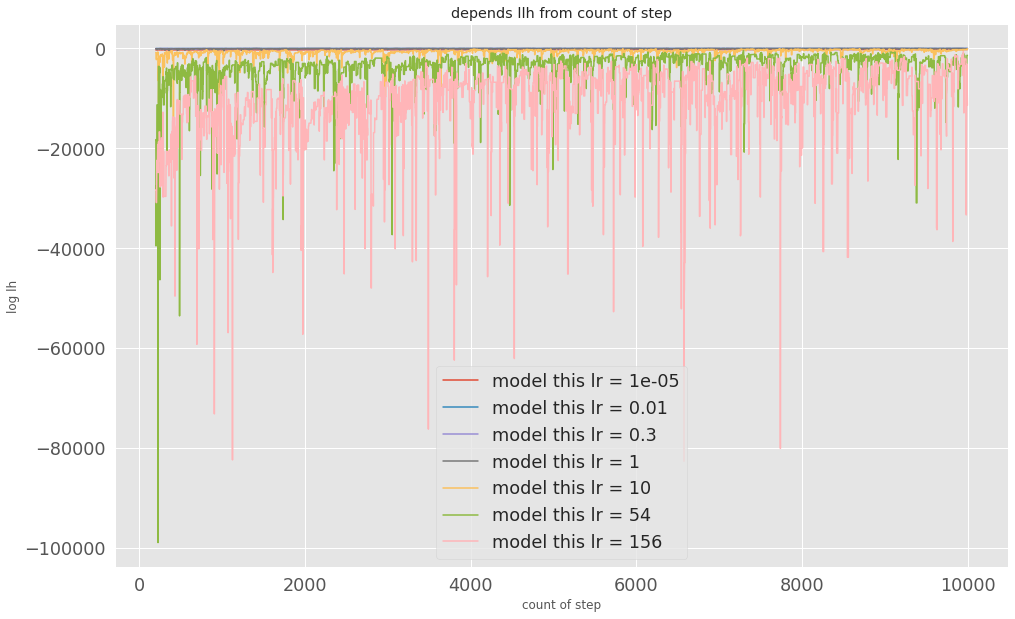

In [30]:
plt.style.use('ggplot')
plt.figure(figsize=(16, 10))
for i in range(0, len(model_list), 3):
    model = model_list[i]
    model_LLH = local_predict(np.array(model.history).reshape((10000, 30)).T, X_train, Y_train)
    x = np.arange(0, 10000)
    plt.plot(x[200:], model_LLH[200:], label='model this lr = ' + str(model.lr))
plt.xlabel('count of step')
plt.ylabel('log lh')
plt.title('depends llh from count of step')
plt.legend()
plt.show()

Видно, только при больших lr. Очевидная проблемма - достаточно большие скачки. Теперь нарисуем график отдельно для маленьких lr < 10.

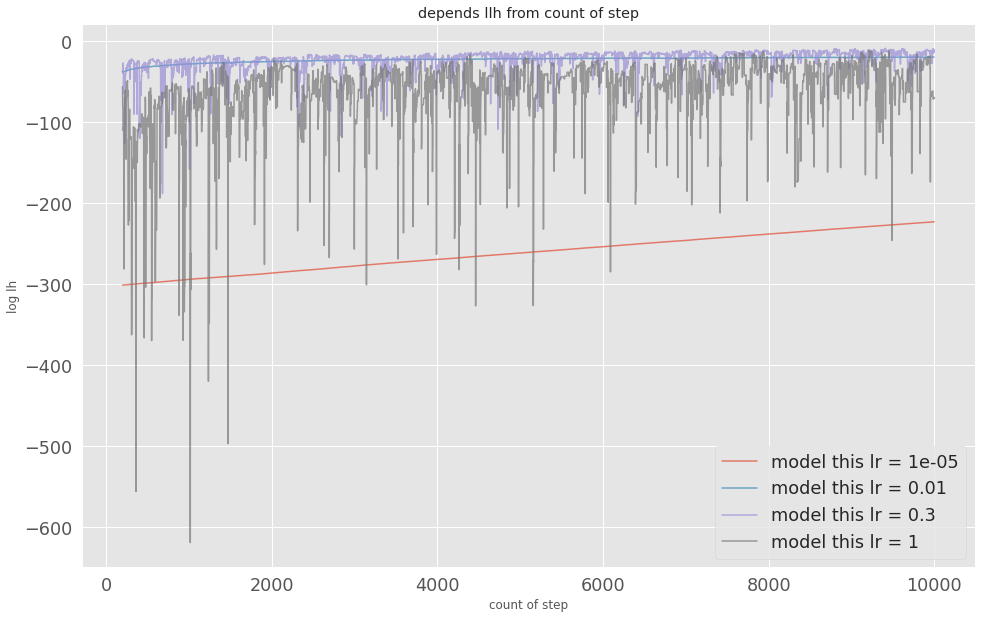

In [31]:
model_list = model_list[:11]
plt.style.use('ggplot')
plt.figure(figsize=(16, 10))
for i in range(0, len(model_list), 3):
    model = model_list[i]
    model_LLH = local_predict(np.array(model.history).reshape((10000, 30)).T, X_train, Y_train)
    x = np.arange(0, 10000)
    plt.plot(x[200:], model_LLH[200:], label='model this lr = ' + str(model.lr), alpha=0.7)
plt.xlabel('count of step')
plt.ylabel('log lh')
plt.title('depends llh from count of step')
plt.legend()
plt.show()

Видно, что при больших значениях lr LLH сильно скачет. При мальньких слабо сходиться.

**5.** Рассмотрите несколько моделей, полученные при помощи GD, в которых установите не менее 5-ти различных коэффициентов регуляризации, а также модель без регуляризатора. Сравните, влияет ли наличие регуляризации на скорость сходимости и качество, сделайте выводы. Под качеством подразумевается значение какой-либо выбранной вами метрики качества классификации.

In [32]:
alphas = [0, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
model_list = list()
for i in alphas:
    model = LogisticRegression(max_iter=10000, method='sgd', lr=2, alpha=i).fit(X_train, Y_train)
    model_list.append(model)

In [33]:
list_this_pres = list()
for i in model_list:
    list_this_pres.append((i.predict(X_test) == Y_test).sum() / Y_test.shape[0])
pd.DataFrame(np.array([list_this_pres, alphas]).T,columns=['precision', 'alpha'])

,precision,alpha
0,0.947368,0.0000
1,0.947368,0.0001
2,0.947368,0.0010
3,0.956140,0.0100
4,0.929825,0.1000
5,0.622807,1.0000
6,0.096491,10.0000
7,0.061404,100.0000


Видно, что при слишком больших параметрах он обучаеться хуже. Давайте посмотрим на скорость сходимости сравним модел без регуляризации и с регуляризацией равной 0.001 как самой успешной

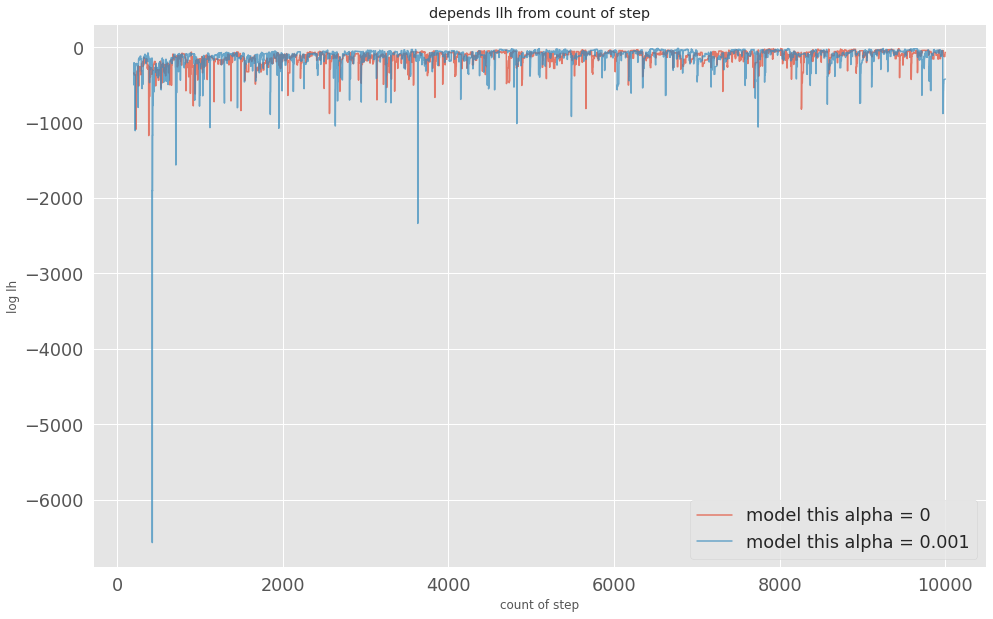

In [199]:
model1 = model_list[0]
model2 = model_list[2]
model1_LLH = local_predict(np.array(model1.history).reshape((10000, 30)).T, X_train, Y_train)
model2_LLH = local_predict(np.array(model2.history).reshape((10000, 30)).T, X_train, Y_train)
x = np.arange(0, 10000)
plt.figure(figsize=(16, 10))
plt.plot(x[200:], model1_LLH[200:], label='model this alpha = 0', alpha=0.7)
plt.plot(x[200:], model2_LLH[200:], label='model this alpha = 0.001', alpha=0.7)
plt.xlabel('count of step')
plt.ylabel('log lh')
plt.title('depends llh from count of step')
plt.legend()
plt.show()

Видно, что параметр регуляризации дает больше выбросов. Построим начальный участок сходимости

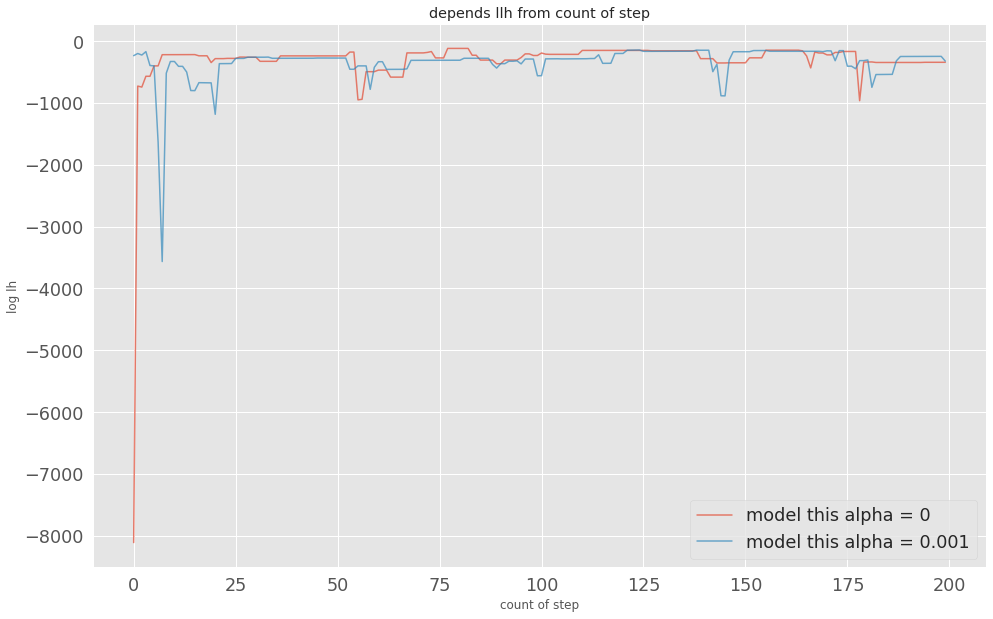

In [200]:
plt.figure(figsize=(16, 10))
plt.plot(x[:200], model1_LLH[:200], label='model this alpha = 0', alpha=0.7)
plt.plot(x[:200], model2_LLH[:200], label='model this alpha = 0.001', alpha=0.7)
plt.xlabel('count of step')
plt.ylabel('log lh')
plt.title('depends llh from count of step')
plt.legend()
plt.show()

С регуляризацией имел изначально не плохое значение, но имеет выбросы.

**6.** Возьмите лучшую модель с предыдущего шага. В исходной выборке оставьте только два произвольных признака и обучите на них модель без использования свободного параметра. Визуализируйте предсказания вероятностей класса $1$ для модели.

In [205]:
X_train = X_train.T[[0, 1]].T
X_test = X_test.T[[0, 1]].T
model = LogisticRegression(max_iter=10000, method='gd', lr=2, alpha=0.001).fit(X_train, Y_train)
predict = model.predict_proba(X_test).T[1]
predict 

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0])

Тут особо визуализировать не чего. Все либо 1 либо 0. Что говорит нам о не достаточной регуляризации((((

**Вывод:** Чем больше фичь тем точнее результат. GD топ. SGD топ за свое время. IRLS ну такое и долго и не  сказать что в разы точнее. Важно грамотно подбирать множетель градиента и параметр регуляризации. Вроде все.

## Задача 4

Обобщите метод IRLS на случай многоклассовой классификации, используя стратегию с softmax-функцией

## Задача 5.

В этой задаче вам предлагается расмотреть и сравнить две стратегии поиска оптимальных значений некоторого функционала: GridSearch и RandomSearch. В реальной жизни значение функционала &mdash; это значение целевой метрики качества, а оптимизация идет по гиперпараметрам некоторой модели машинного обучения. Коротко напомним, в чем же заключается каждая стратегия.

* GridSearch &mdash; полный перебор по сетке. Суть перебора по сетке заключается в следующем: вы задаете область значений гиперпараметров, которые хотите оптимизировать, обучаете все модели, которые возможно получить в рамках заданного пространства поиска гиперпараметров. Затем выбираете из данных моделей ту, которая дала наилучшее качество на кросс-валидации.
* RandomSearch &mdash; это стратегия, при которой рассматривается некоторая выборка из множества значений гиперпараметров. По умолчанию часто используется равномерное распределение. Лучшая модель выбирается так же на основе кросс-валидации.

Разберем сначала **одномерный случай**. Для этого рассмотрим следующую функцию.

In [48]:
def f(x):
    return 5.2 - 5/(1+(3*(x))**2) - np.cos(x)/5

Поcтройте график функции $f(x)$ на отрезке $[-20, 20]$. В чем его особенность?

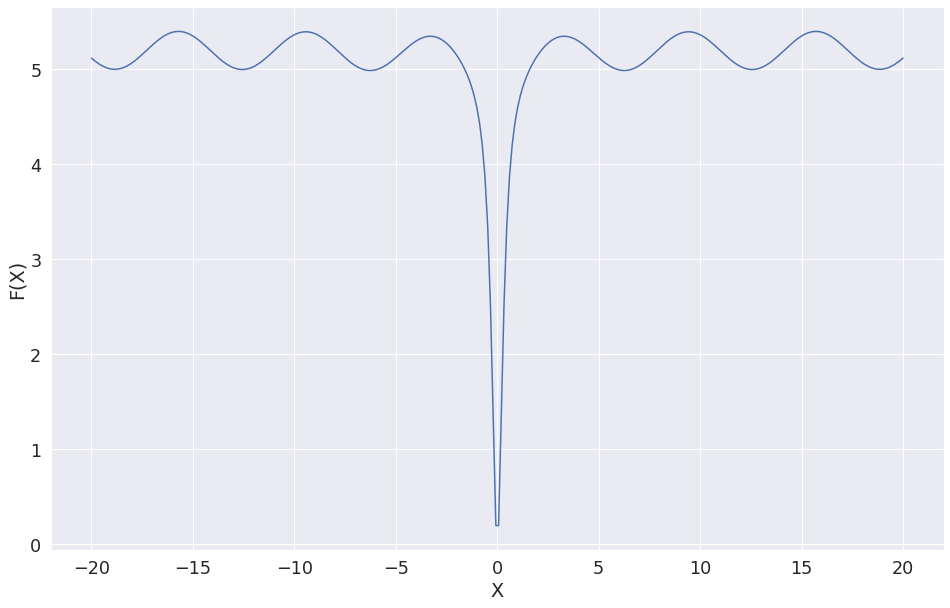

In [49]:
x = np.linspace(-20, 20, 300)
plt.figure(figsize=(16, 10))
plt.plot(x, f(x))
plt.xlabel('X')
plt.ylabel('F(X)')
plt.show()

Подумайте, какие проблемы могут возникнуть при поиске минимума этой функции, если используется поиск по сетке?

**Ответ:**  Особенность функции в том, что у нее точки близкие к минимуму очень узки. Gridsearch может их не отследить

Рассмотрим **поиск по сетке** и проведем вычислительный эксперимент. Для этого будем генерировать случайное смещение из $U[-0.5, 0.5]$, а затем рассматривать смещенную на $x_0$ сетку размера $n$ на отрезке $[-10, 10]$, после чего поиском по сетке искать оптимальное значение $f$.

In [50]:
from tqdm import tqdm

In [51]:
# рассматриваемые размеры сеток
grid_size = np.arange(2, 1000)
n_experiments = 100  # количество экспериментов

In [52]:
# массив для минимумов по сетке для текущего эксперимента
grid_min_f_trace = []

for i in tqdm(range(n_experiments)):
    # случайное смещение сетки на [-0.5, 0.5]
    x_0 = sps.uniform.rvs(size=1) - 0.5
    # массив для минимумов для текущего размера сетки
    grid_f_min = []
    # цикл по размеру сетки
    for n in grid_size:
        # сетка на [-10, 10] размера n
        grid = np.linspace(-10, 10, n) + x_0
        # найденный по сетке со смещением x_0 минимум функции f
        f_min = np.min(f(grid))
        # сохраним минимум для сетки размера n
        grid_f_min.append(f_min)
    # сохраним минимумы текущего эксперимента
    grid_min_f_trace.append(grid_f_min)

100%|██████████| 100/100 [00:06<00:00, 14.67it/s]


Для нескольких экспериментов постройте графики значений минимума от количества точек в сетке. 
Для большей наглядности и информативности сразу **зафиксируйте диапазон значений по оси y**, а также отображайте графики в **логарифмическом масштабе**.

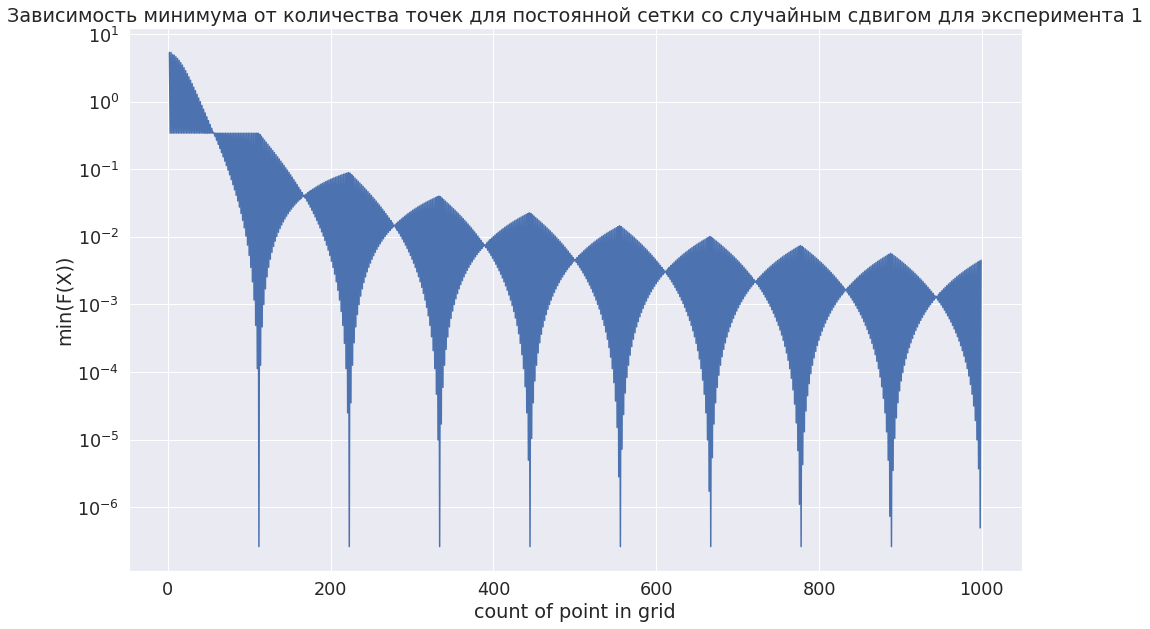

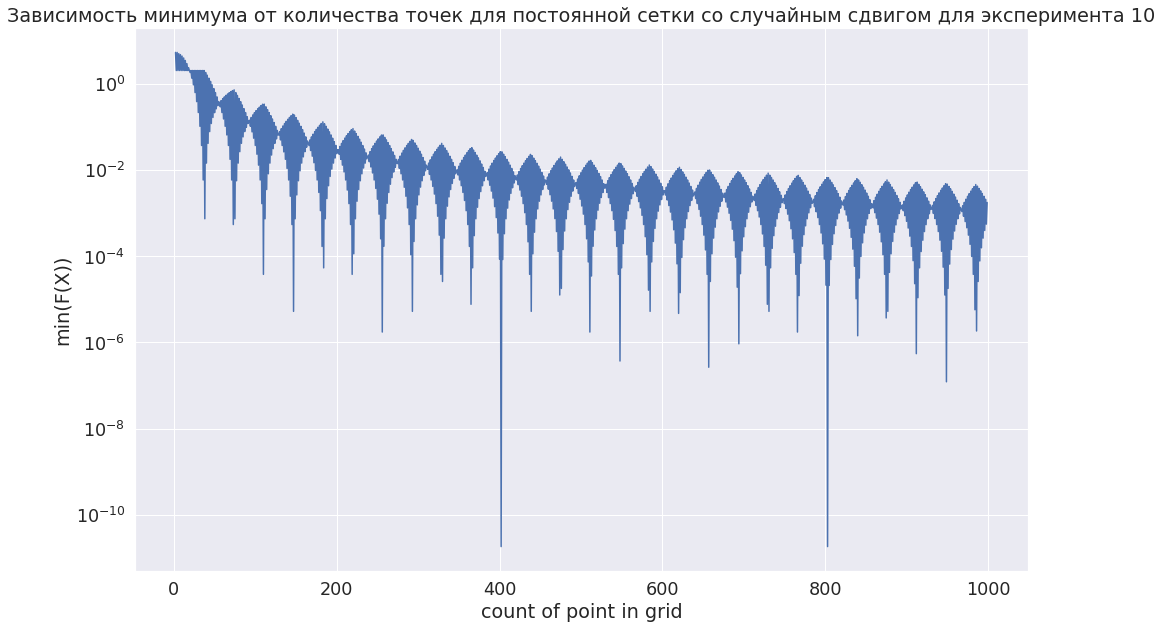

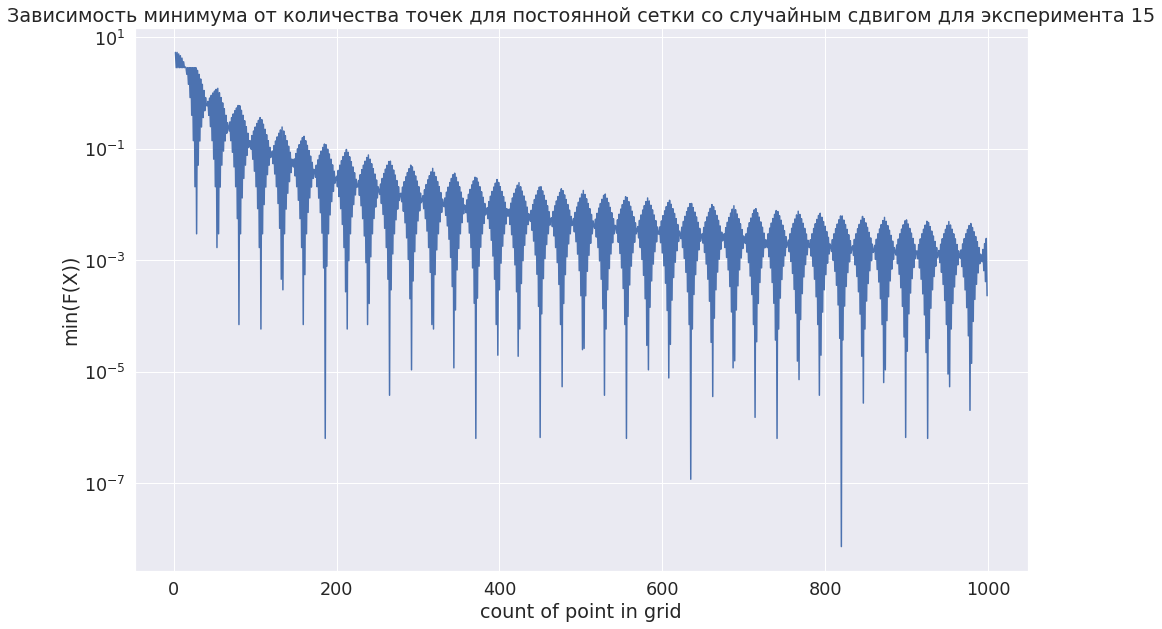

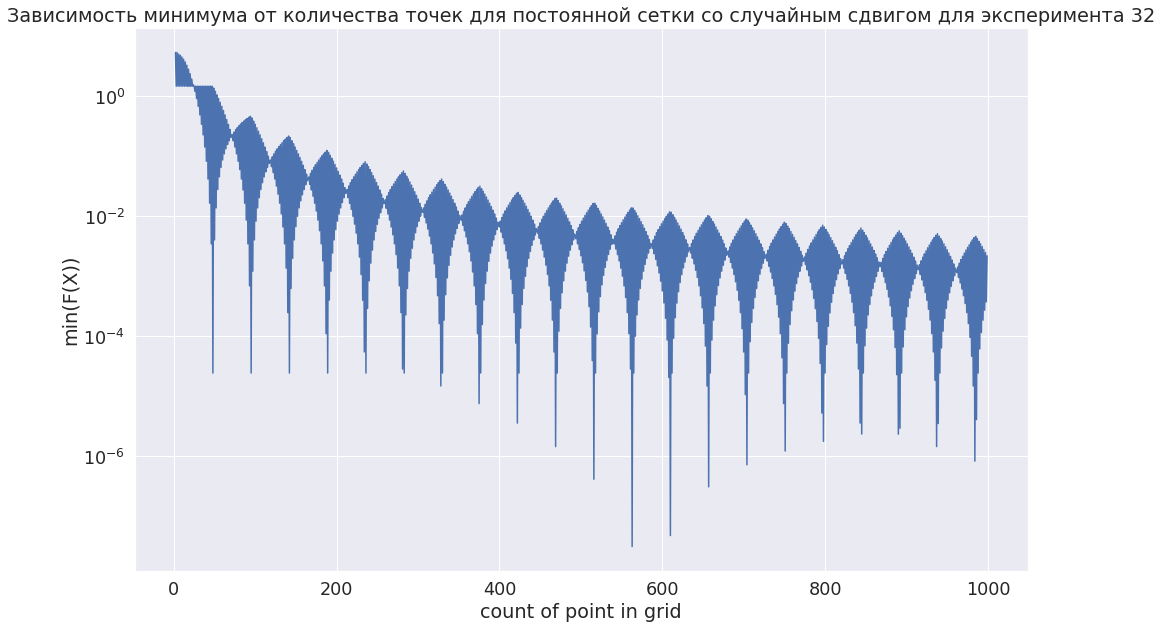

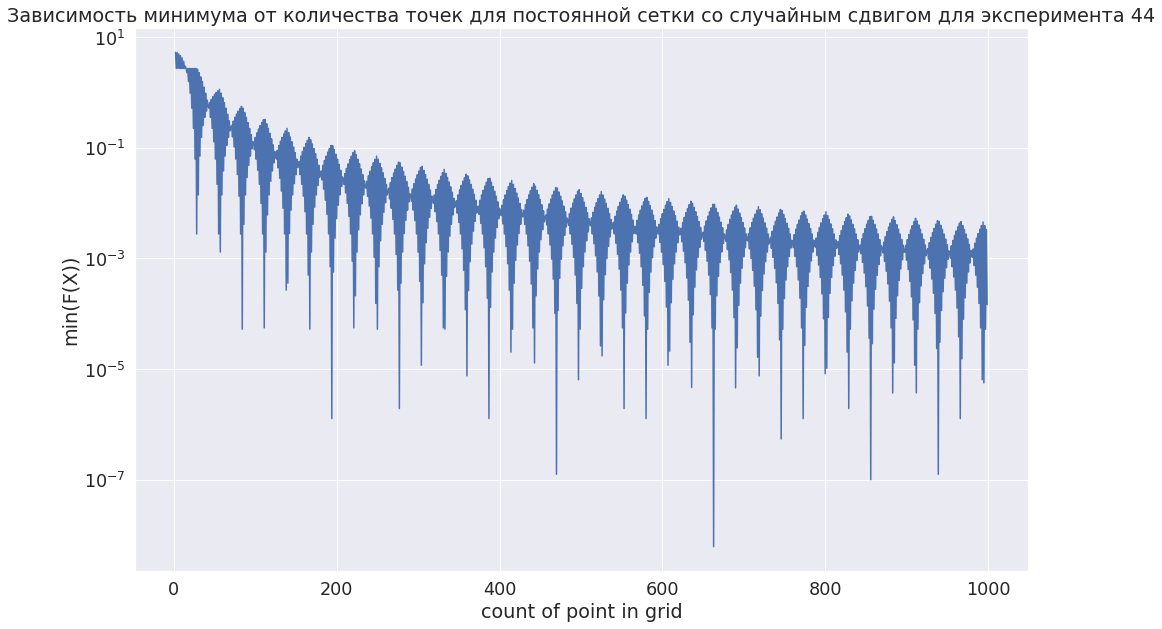

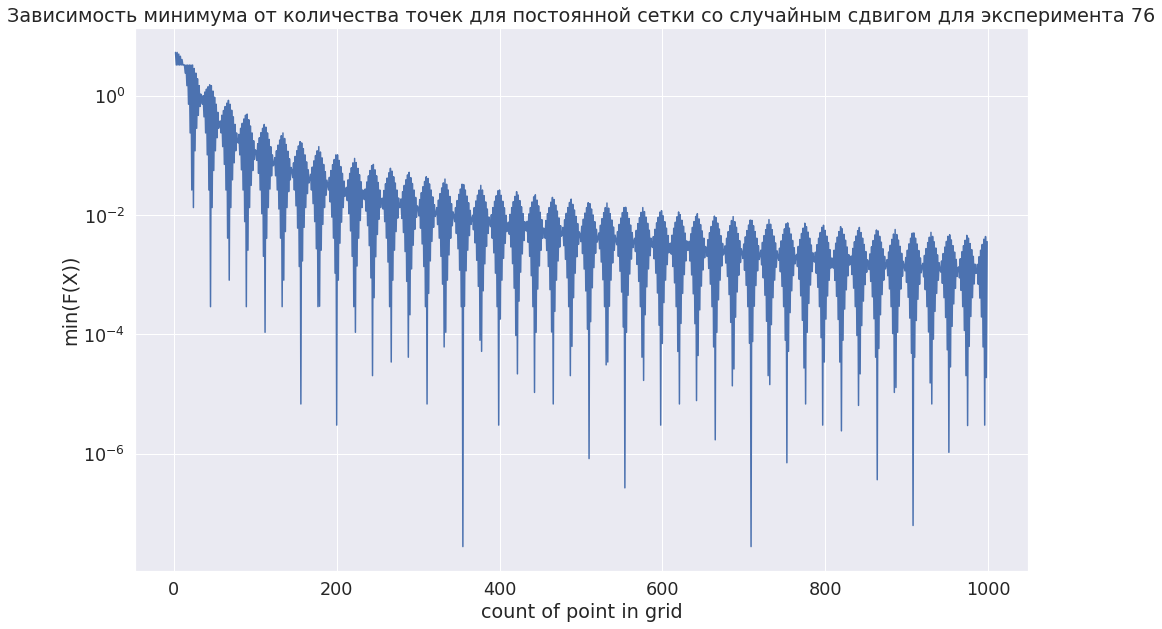

In [53]:
nomber_of_experiment = [1, 10, 15, 32, 44, 76]
for i in nomber_of_experiment:
    y = grid_min_f_trace[i]
    plt.figure(figsize=(16, 10))
    plt.plot(grid_size, y)
    plt.xlabel('count of point in grid')
    plt.ylabel('min(F(X))')
    #plt.ylim((0, 1)) Установка ylim не добавит читабельности графикам.
    plt.title('Зависимость минимума от количества точек для постоянной сетки со случайным сдвигом для эксперимента ' + str(i))
    plt.yscale('log')
    plt.show()

Теперь рассмотрим **случайный поиск**. Снова проведем вычислительный эксперимент. Обратите внимание, что случайные точки для эксперимента мы генерируем один раз.

In [54]:
# рассматриваемое количество случайных точек
random_size = np.arange(2, 1000)

In [55]:
# массив для минимумов для текущего эксперимента
random_min_f_trace = []

# цикл по экспериментам
for i in tqdm(range(n_experiments)):
    # случайное смещение на [-0.5, 0.5]
    x_0 = sps.uniform.rvs(size=1) - 0.5
    # массив для минимумов для текущего количества точек
    random_min_f = []
    # сгенерируем случайные на [-10, 10] точки сразу
    points = sps.uniform.rvs(loc=-10, scale=20, size=np.max(random_size)) + x_0
    
    #цикл по количеству точек
    for n in random_size:
        # найденный по первым n случайным точкам со смещением x_0 минимум функции f
        f_min = np.min(f(points[:n]))
        # сохранение результатов
        random_min_f.append(f_min)
        
    random_min_f_trace.append(random_min_f)

100%|██████████| 100/100 [00:03<00:00, 32.21it/s]


Снова для нескольких экспериментов постройте графики значений минимума от количества точек при случайном поиске.

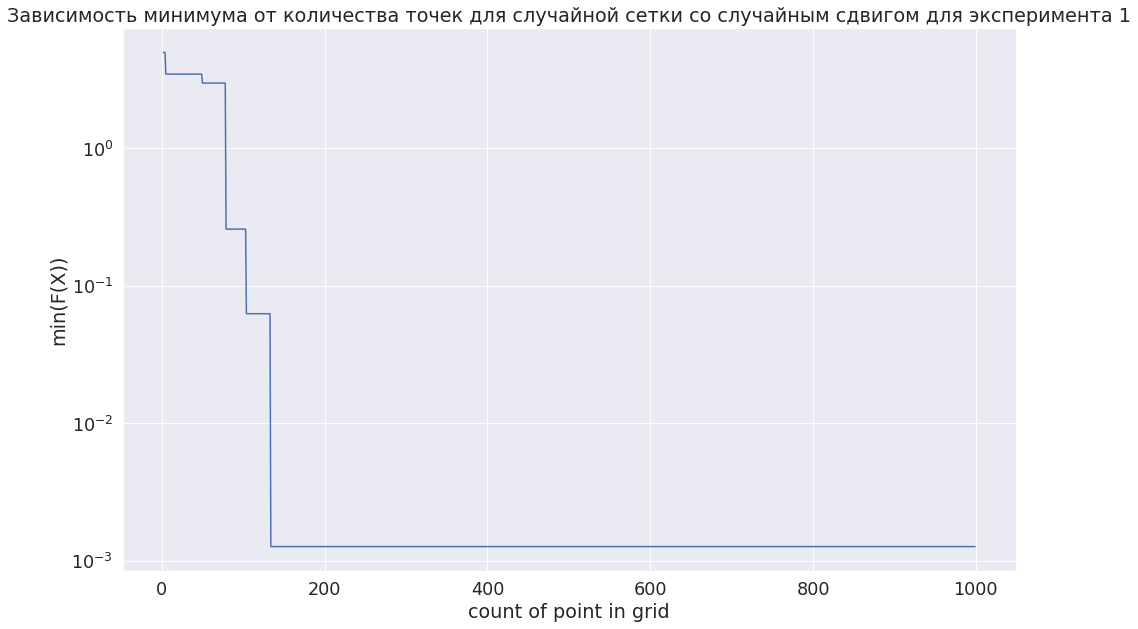

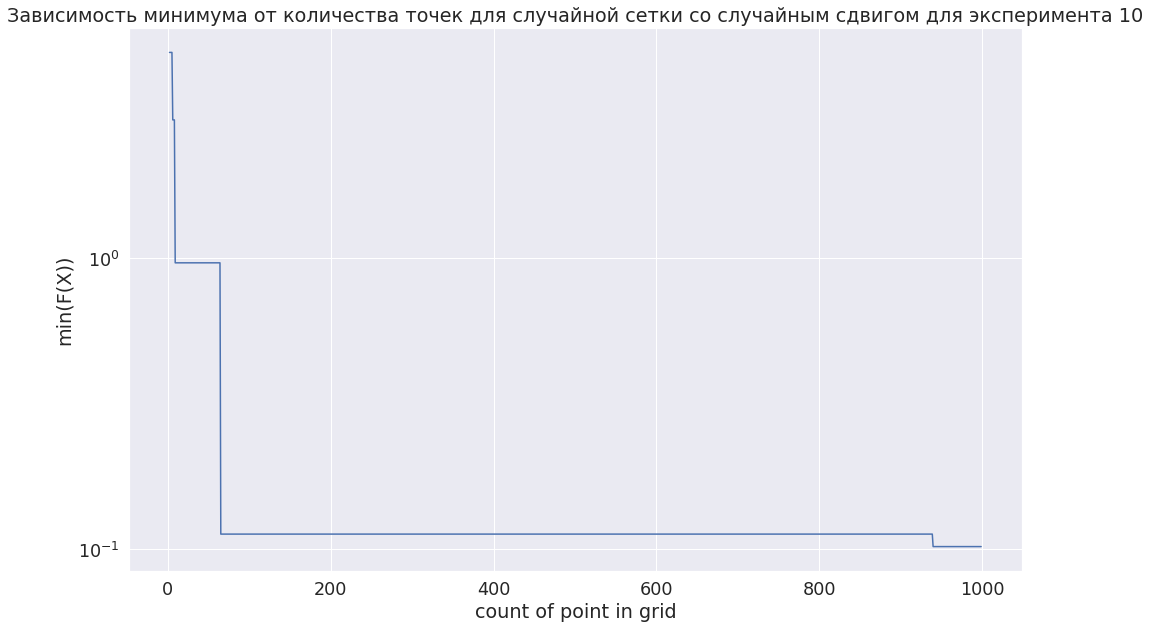

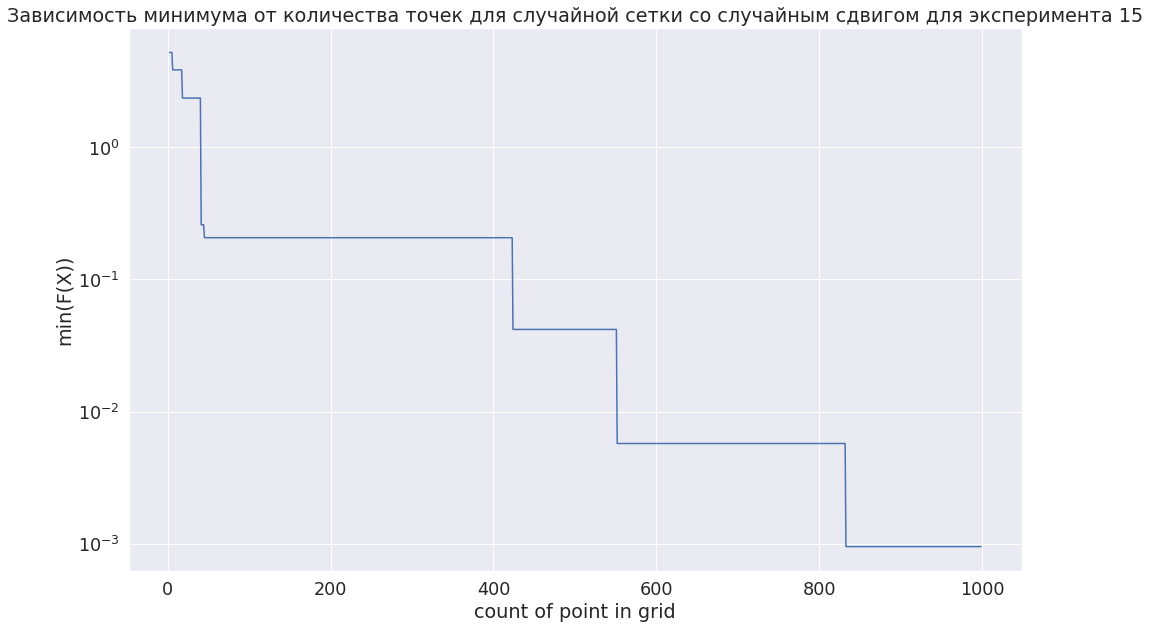

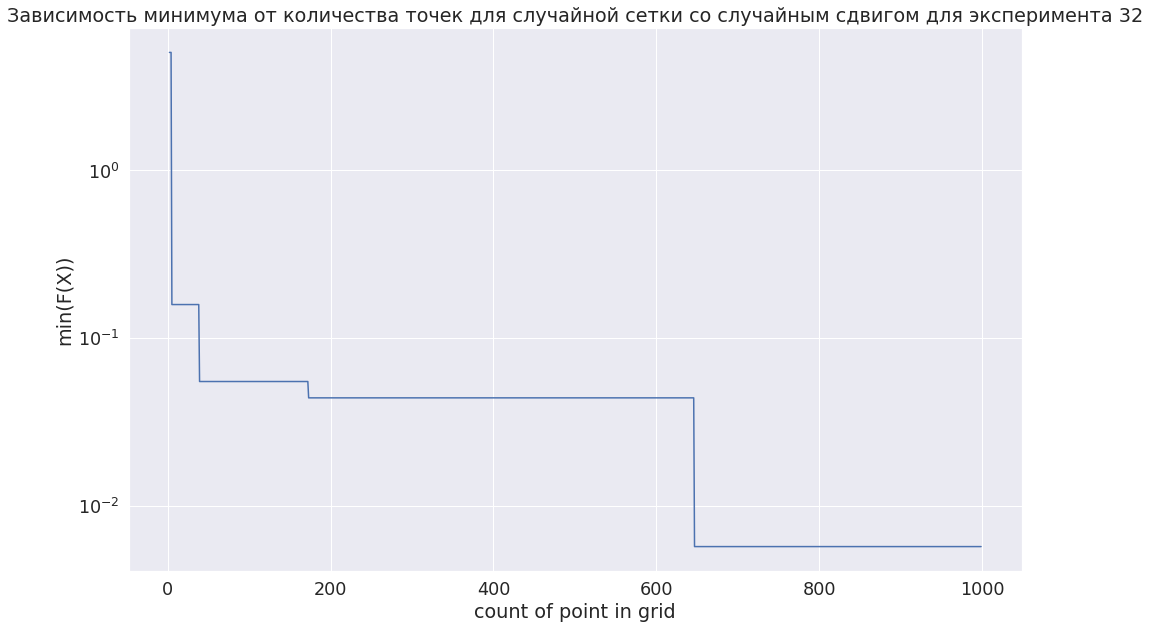

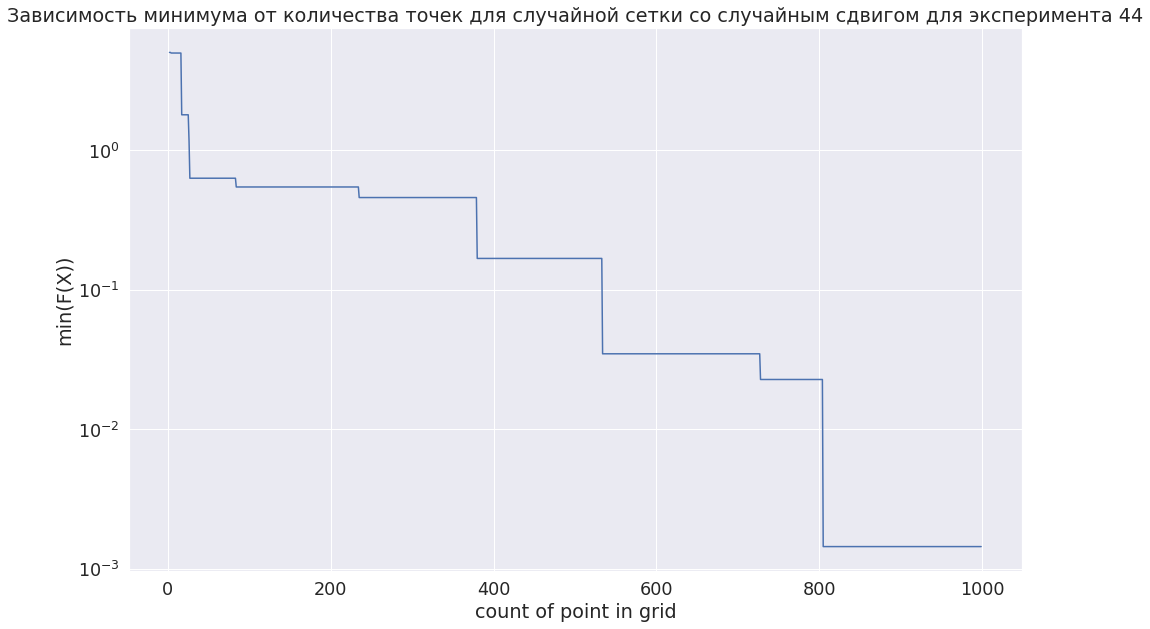

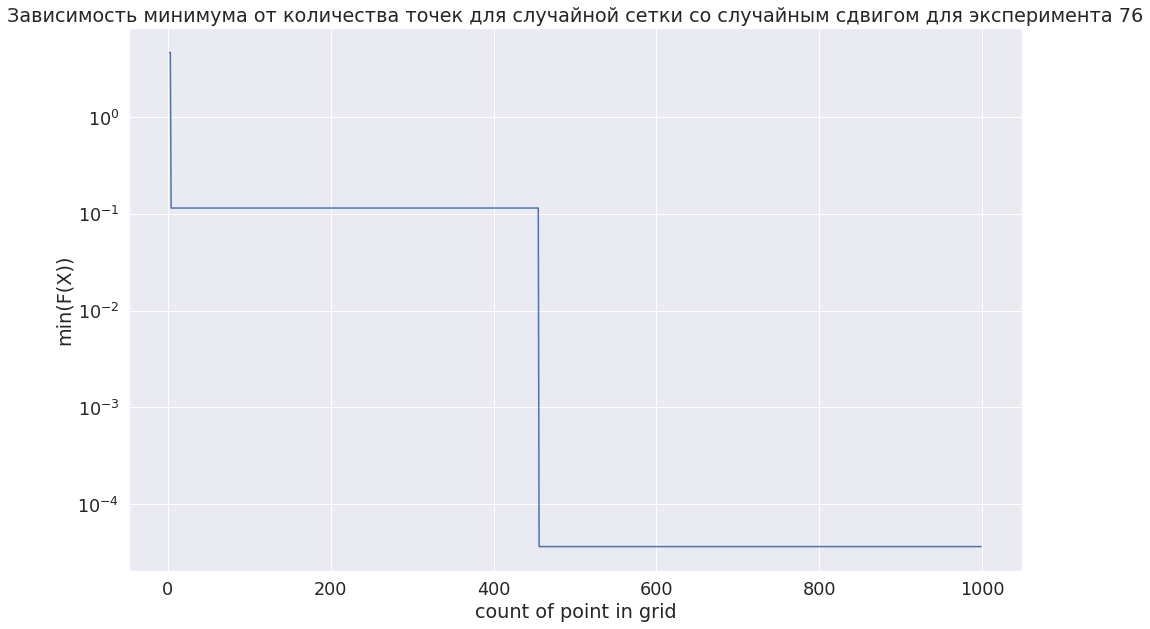

In [56]:
nomber_of_experiment = [1, 10, 15, 32, 44, 76]
for i in nomber_of_experiment:
    y = random_min_f_trace[i]
    plt.figure(figsize=(16, 10))
    plt.plot(grid_size, y)
    plt.xlabel('count of point in grid')
    plt.ylabel('min(F(X))')
    plt.title('Зависимость минимума от количества точек для случайной сетки со случайным сдвигом для эксперимента ' + str(i))
    #plt.ylim((0, 1)) Установка ylim не добавит читабельности графикам.
    plt.yscale('log')
    plt.show()

Мое почтение! Ай да метод. Ну кстати хочеться отметить, что это не совсем честно, так как в данном случае мы просто добавляли еще случайные точки, не ухудшая результат в то время как сетку мы двигали.

Сравним два метода. Для этого постройте график зависимости найденного минимума от количества точек (случайных или в сетке). Перед этим предварительно усредните результат по количеству экспериментов. Какие результаты у вас получились?

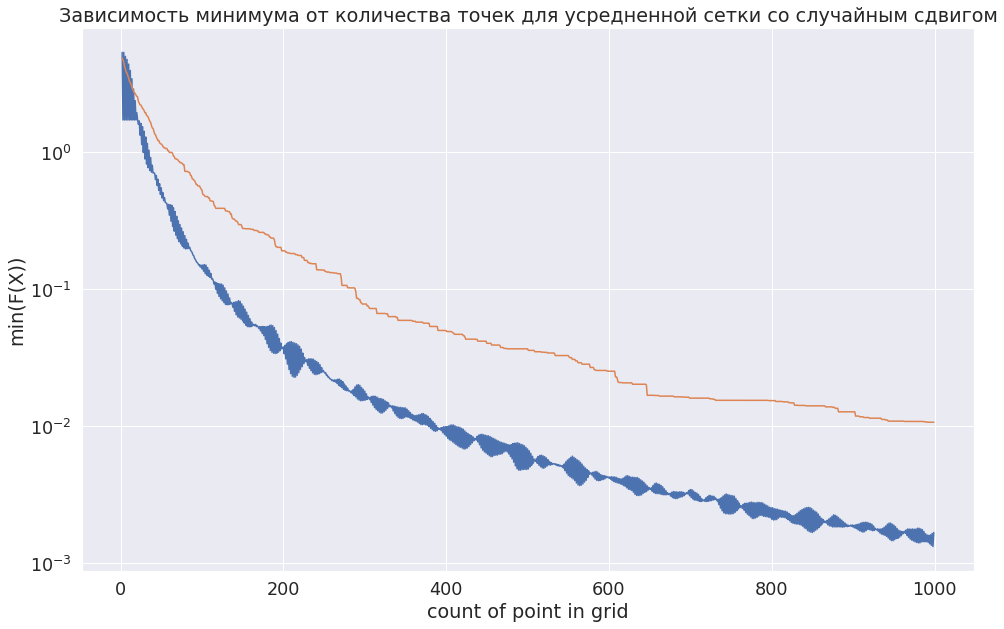

In [57]:
grid = np.array(grid_min_f_trace).mean(axis=0)
random_point = np.array(random_min_f_trace).mean(axis=0)
plt.figure(figsize=(16, 10))
plt.plot(grid_size, grid, label='normal grid')
plt.plot(grid_size, random_point, label='random grid')
plt.xlabel('count of point in grid')
plt.ylabel('min(F(X))')
plt.title('Зависимость минимума от количества точек для усредненной сетки со случайным сдвигом')
#plt.ylim((0, 1)) Установка ylim не добавит читабельности графикам.
plt.yscale('log')
plt.show()

Видно, что случайная сетка всюду хуже регулярной

Теперь расмотрим **двумерный случай**, для этого определим следующую функцию:

In [58]:
def f(x, y,):
    return 5.4 - 5/(1+(3*x)**2) - np.cos(x)/5 - np.cos(y)/5

Постройте тепловую карту значений этой функции на $[-20, 20]^2$.

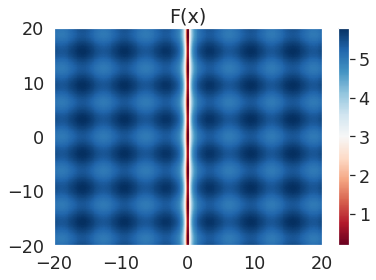

In [59]:
y, x = np.meshgrid(np.linspace(-20, 20, 300), np.linspace(-20, 20, 300))
z = f(x, y)
fig, ax = plt.subplots()
c = ax.pcolormesh(x, y, z, cmap='RdBu')
ax.set_title('F(x)')
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)
plt.show()

In [60]:
# массив для минимумов по сетке для текущего эксперимента
n_experiments = 10
grid_min_f_trace = []
for i in tqdm(range(n_experiments)):
    # случайное смещение сетки на [-0.5, 0.5]
    x_0 = sps.uniform.rvs(size=1) - 0.5
    # массив для минимумов для текущего размера сетки
    grid_f_min = []
    # цикл по размеру сетки
    for n in grid_size:
        # сетка на [-10, 10] размера n
        grid = np.linspace(-10, 10, n) + x_0
        grid = np.meshgrid(grid, grid)
        # найденный по сетке со смещением x_0 минимум функции f
        f_min = np.min(f(grid[0], grid[1]))
        # сохраним минимум для сетки размера n
        grid_f_min.append(f_min)
    # сохраним минимумы текущего эксперимента
    grid_min_f_trace.append(grid_f_min)

100%|██████████| 10/10 [02:17<00:00, 13.79s/it]


In [61]:
# массив для минимумов для текущего эксперимента
random_min_f_trace = []

# цикл по экспериментам
for i in tqdm(range(n_experiments)):
    # случайное смещение на [-0.5, 0.5]
    x_0 = sps.uniform.rvs(size=1) - 0.5
    # массив для минимумов для текущего количества точек
    random_min_f = []
    # сгенерируем случайные на [-10, 10] точки сразу
    pointsx = sps.uniform.rvs(loc=-10, scale=20, size=np.max(random_size)) + x_0
    pointsy = sps.uniform.rvs(loc=-10, scale=20, size=np.max(random_size)) + x_0
    
    #цикл по количеству точек
    for n in random_size:
        # найденный по первым n случайным точкам со смещением x_0 минимум функции f
        random_grid = np.meshgrid(pointsx[:n], pointsy[:n])
        f_min = np.min(f(random_grid[0], random_grid[1]))
        # сохранение результатов
        random_min_f.append(f_min)
        
    random_min_f_trace.append(random_min_f)

100%|██████████| 10/10 [02:09<00:00, 12.91s/it]


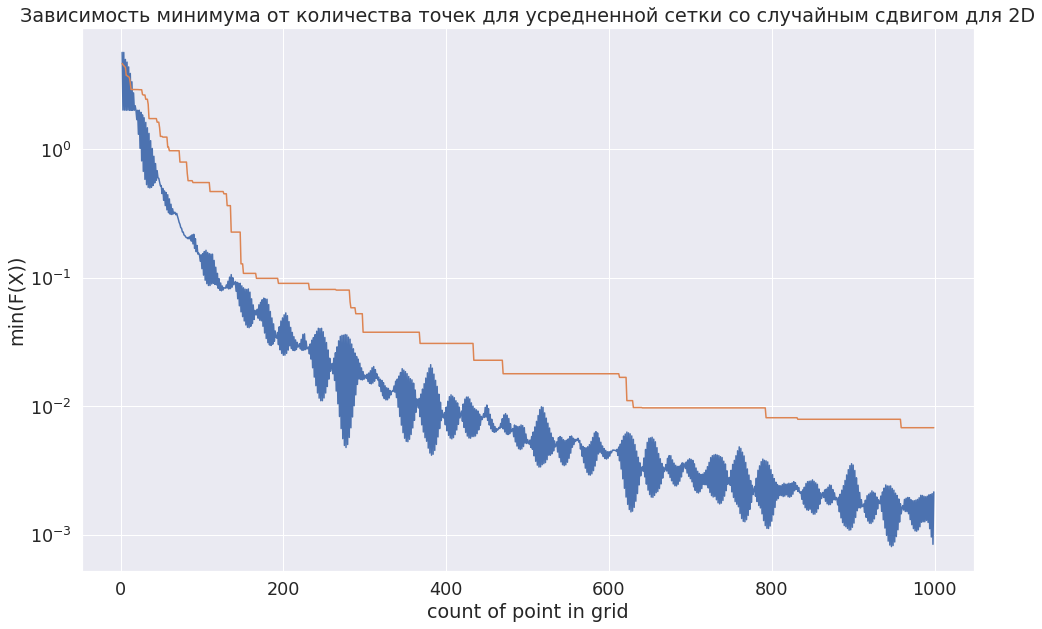

In [64]:
grid = np.array(grid_min_f_trace).mean(axis=0)
random_point = np.array(random_min_f_trace).mean(axis=0)
plt.figure(figsize=(16, 10))
plt.plot(grid_size, grid, label='normal grid')
plt.plot(grid_size, random_point, label='random grid')
plt.xlabel('count of point in grid')
plt.ylabel('min(F(X))')
plt.title('Зависимость минимума от количества точек для усредненной сетки со случайным сдвигом для 2D')
#plt.ylim((0, 1)) Установка ylim не добавит читабельности графикам.
plt.yscale('log')
plt.show()

Проведите эксперимент, аналогичный одномерному случаю. В случае поиска по сетке рассмотрите сетку размера $n$ на $[-10, 10]$ по каждой координате. Таким образом, общий размер сетки будет $n^2$. Для ускорения вычислений в случае случайного поиска будет достаточно рассмотреть только такое количество точек, которое соответствует рассмотренным размерам сетки (т.е. квадраты чисел).

Сравните результат с полученным ранее. Сделайте вывод.

**Вывод:** Регулярная сетка при любом раскладе лучше. Странно я думмал будет аналогия с методом Ньютона и Монте Карло, но нет.